## Worksheet Week 3
### Classification I

In this worksheet you will work on a simple binary classification problem based on k-nearest neighbor classifier. 

### PART I: Understanding the data

We will work with the Breast Cancer Wisconsin dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

For more information, see https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

**0. Up and running**

a) Import `numpy`, `matplotlib.pyplot` and `pandas`

**1. Load the dataset.**

a) You can use sklearn's datasets package, and the function `load_breast_cancer()`

b) Turn this data into a DataFrame, and have a look at it (using the functions ``head()`` and ``describe()``

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())
print(df.describe())
print(df.shape)
print(df.info())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

**2. Exploring the data**

a) How many samples are there? how many features, and what kind are they?

b) What is the distribution of classes in this dataset?

c) To gain some more insight into these features, have a look at the distribution of the first four features. An appealing way of this is by computing *violin plots*. Try using the function `violinplot` of the `seaborn` package to display the distributions of the first four features *per class*

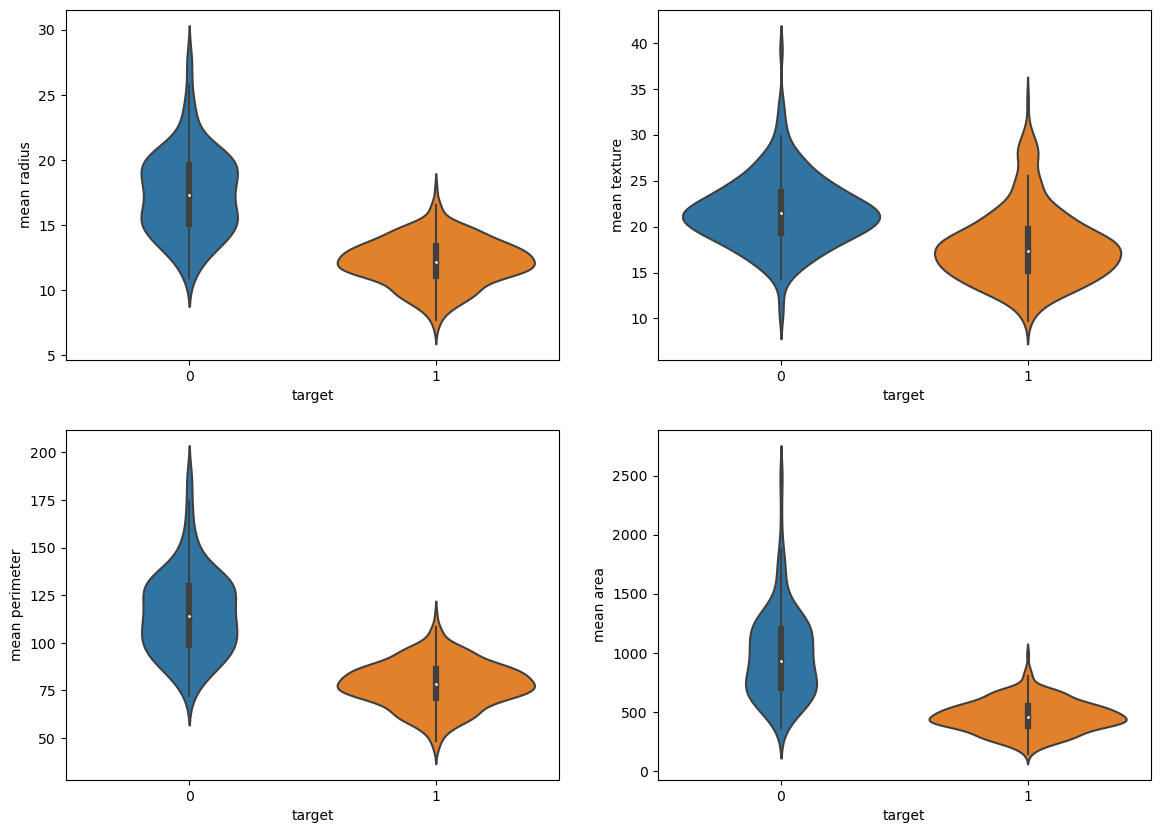

In [2]:
import seaborn as sns
# From df.describe(), we see there are 569 samples with 10 unique features that are all float64
# we see that 357 people have the tumor, and 212 don't
df['target'].value_counts()
plt.figure(figsize= (14,10))
plt.subplot(2,2,1)
sns.violinplot(x='target', y='mean radius', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='target', y='mean texture', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='target', y='mean perimeter', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='target', y='mean area', data=df)
plt.show()

## Part II: Classification

**1. Getting started**

a) Split the data into a training and validation set, at a ratio of 70/30. You can do this manually, or use the function `train_test_split()` from the package `sklearn.model_selection`.

b) Compute the distribution of positive and negative samples in your training and validation splits. Are they the same as the distribution of the original data? Compare with by using the parameter `stratify` within `train_test_split()`.

c) Import the function from `KNeighborsClassifier` from the package `sklearn.neighbors`, and create a classifier with the choice of $k=1$ -- one neighbor. Have a look at https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html for details

d) Fit the classifier (use the method `fit()` of the instance you created) to your training data, and then compute accuracy (use the method `score()`) on the validation data. What is the accuracy of this classifier?



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
X = np.array(df.iloc[:,0:29])
y = np.array(df.iloc[:,30])
xtrain, xtest, ytrain, ytest = train_test_split(X,y,stratify=y, test_size = 0.3)
positive_train = np.sum(ytrain == 1)
positive_test = np.sum(ytest == 1)
print(f'positive cases from training data = {positive_train}')
print (f'positive cases from testing data = {positive_test}')
print (f'positive cases from original data = 357')

classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(xtrain,ytrain)
print(classifier.score(xtest,ytest))
#fairly accurate as the score is above 0.9

positive cases from training data = 250
positive cases from testing data = 107
positive cases from original data = 357
0.9239766081871345


**2. Dependence on amounts of data**

We will now explore how this performance depends on the number training data. 


a) As before, construct a training set and validation set.

b) Fit a k-NN classifier with increasing amounts of data, from 1 to $60$, then. For each model, record its training accuracy and validation accuracy.

c) Plot the obtained training and validation accuracy as a function of the number of training samples.

d) Since your results will depend on the specific (random) draw of your data, repeat points *a* and *b* above 20 times, each drawing a different split of training/validation. Finally, plot the *average* of the accuracies (training and validation) for each number of training samples.

e) Why is the training accuracy at 1?

f) Run again point *d* above, but now using a k-nearest neighbor classifier with $k=5$. What happened to the training accuracy, and why?

g) Noting that the validation accuracy is an unbiased estimate of the Risk of the classifier, what can you say about the value of the Training Error? is it unbiased?

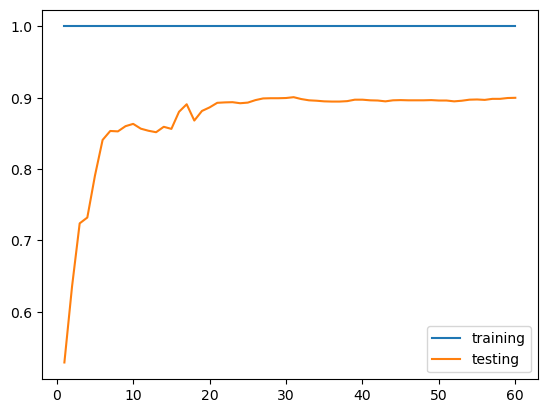

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 

training_accuracy = [0 for x in range(60)]
validation_accuracy = [0 for x in range(60)]

for x in range (20):
    X = np.array(df.iloc[:,0:29])
    y = np.array(df.iloc[:,30])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
    for i in range(1, 61):
        classifier = KNeighborsClassifier(n_neighbors=1)
        classifier.fit(X_train[:i], y_train[:i])
        training_accuracy[i-1] += (classifier.score(X_train[:i], y_train[:i])/20)
        validation_accuracy[i-1] += (classifier.score(X_val, y_val)/20)

plt.plot(range(1,61), training_accuracy, label='training')
plt.plot(range(1,61), validation_accuracy, label='testing')
plt.legend()
plt.show()

#training accuracy is at 1 because with only 1 neighbor, every training point will classify itself as its actual color. 
    

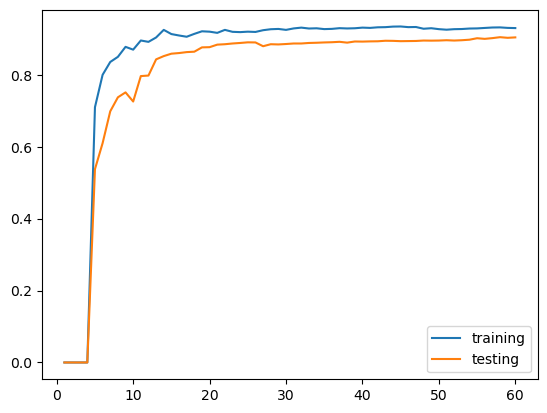

In [11]:
training_accuracy = [0 for x in range(60)]
validation_accuracy = [0 for x in range(60)]

for x in range (20):
    X = np.array(df.iloc[:,0:29])
    y = np.array(df.iloc[:,30])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)
    for i in range(5, 61):
        classifier = KNeighborsClassifier(n_neighbors=5)
        classifier.fit(X_train[:i], y_train[:i])
        training_accuracy[i-1] += (classifier.score(X_train[:i], y_train[:i])/20)
        validation_accuracy[i-1] += (classifier.score(X_val, y_val)/20)

plt.plot(range(1,61), training_accuracy, label='training')
plt.plot(range(1,61), validation_accuracy, label='testing')
plt.legend()
plt.show()

# training accuracy went down because now we have multiple neighbors, so even if there is an actual tumor point,
# if most of its neighbors are non tumors, it will get classified wrongly as a non-tumor point. 
# Training error is not unbiased because the classifier has been trained on the training data, so it may be 
# overfit to the training data as compared to the validation data. 

**3. Number of Neighbors**

This classifier has 1 (hyper)parameter that needs tuning: the number of neighbors, $k$. While we will cover model selection later in the class, it is useful for you to start thinking about these questions.

We will select this parameter as the one that maximizes performance *on a validation set*. 

a) Similarly as before, partition your data into a training and validation set, now using 75% for the validation set. Train *different* kNN classifiers (for different values of k) on the training set, and evaluate their performance on the validation set, and plot the validation accuracy as a function of k. Adequate values of K to explore might be `K =  [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35]`.

b) Also, as before, one single run will have too high variance (because of the limited number of samples). As you did in 2.d, repeat this process 20 times, and report the mean validation accuracy as a function of $k$. Moreover, plot this mean together with its $5^{th}$ and $95^{th}$ percentiles of the accuracy for each $k$ (consider using the function `fill_between` of `matplotlib.pyplot`, as well as `numpy`'s `percentile` function. (use the `alpha` parameter for some extra aesthetics!)

c) What can you conclude about the number k? How does it influence the result? What value k would you choose?

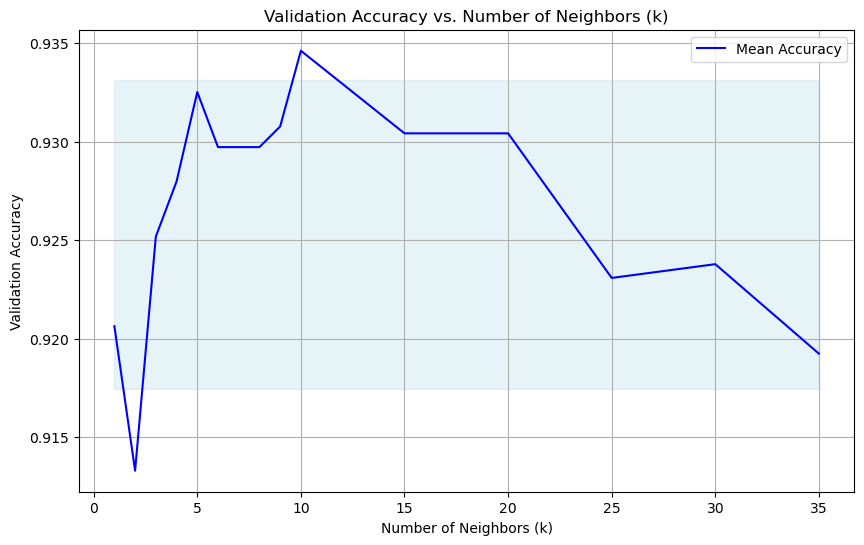

In [6]:
k_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35]

val_accuracy = [0 for x in range(15)]

for i in range(20):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)
    for j in range(15):
        knn = KNeighborsClassifier(n_neighbors=k_vals[j])
        knn.fit(X_train, y_train)
        val_accuracy[j] += (knn.score(X_val, y_val)/20)

fifth_percentile = np.percentile(val_accuracy, 5, axis=0)
ninety_fifth_percentile = np.percentile(val_accuracy, 95, axis=0)

# Plot mean accuracy and percentiles
plt.figure(figsize=(10, 6))
plt.plot(k_vals, val_accuracy, label='Mean Accuracy', color='blue')
plt.fill_between(k_vals, fifth_percentile, ninety_fifth_percentile, color='lightblue', alpha=0.3)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Number of Neighbors (k)')
plt.legend()
plt.grid(True)
plt.show()

# our accuracy grows with k up to a certain point, at which we are considering too many neighbors and our accuracy
# actually starts to decrease. So, we want the k that maximizes the validation accuracy, and in our case, that k seems
# to be around 10 neighbors. 